# **Spectrum module**

In [1]:
from yaiv import spectrum
print(spectrum.__doc__)


YAIV | yaiv.spectrum

This module defines core classes for representing and plotting the eigenvalue spectrum
of periodic operators, such as electronic bands or phonon frequencies, across a set of
k-points. It also supports reciprocal lattice handling and coordinate transformations.

The classes in this module can be used independently or as output containers from
grepping functions.

Classes
-------
Spectrum
    General container for k-resolved eigenvalue spectra (e.g., bands, phonons).
    Supports plotting, DOS calculation, and band visualizations.
    Provides:
    - get_DOS(...): Computes the density of states via Gaussian or Methfessel–Paxton smearing.
    - plot(...): Plots the band structure along a cumulative k-path.
    - plot_fat(...): Fat-band style scatter plot for visualizing weights/projections over bands.
    - plot_color(...): Color-gradient line plot for weights/projections over bands.

ElectronBands
    Specialized `Spectrum` subclass for electronic band structures e

---
>*The **documentation** of every function is accesible with the usual **shift + tab** shortcut.*
---

# Examples

In [4]:
from yaiv import spectrum
from yaiv import grep
import matplotlib.pyplot as plt

## Electronic bands

In [5]:
# Load the object
bands=spectrum.ElectronBands('data/qe/results_bands/Si.bands.pwo')
print("The ElectronBands object contains")
print(bands.__dict__.keys())

The ElectronBands object contains
dict_keys(['filepath', 'electron_num', 'fermi', 'eigenvalues', 'kpoints', 'weights', '_lattice', '_k_lattice', 'kpath', 'DOS'])


### Basic plot

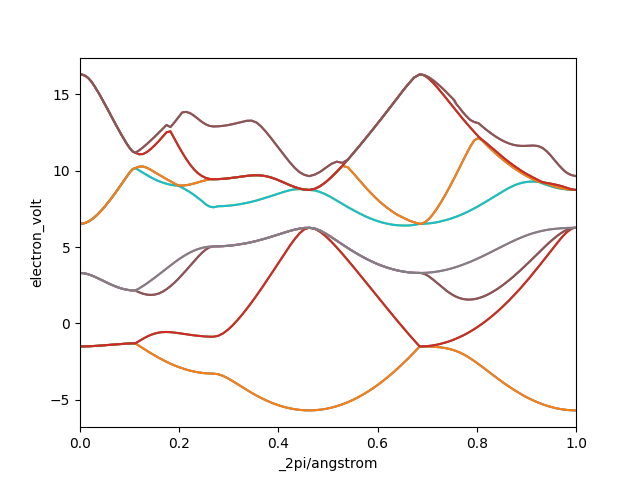

In [6]:
# Very easy and direct plot to do
ax=bands.plot()
plt.show()


### Fat bands plot

Different styles of **fat bands** plotting are supported. The only condition is that the weights (controlling the fatness of the band) have the shame shape as the eigenvalues.

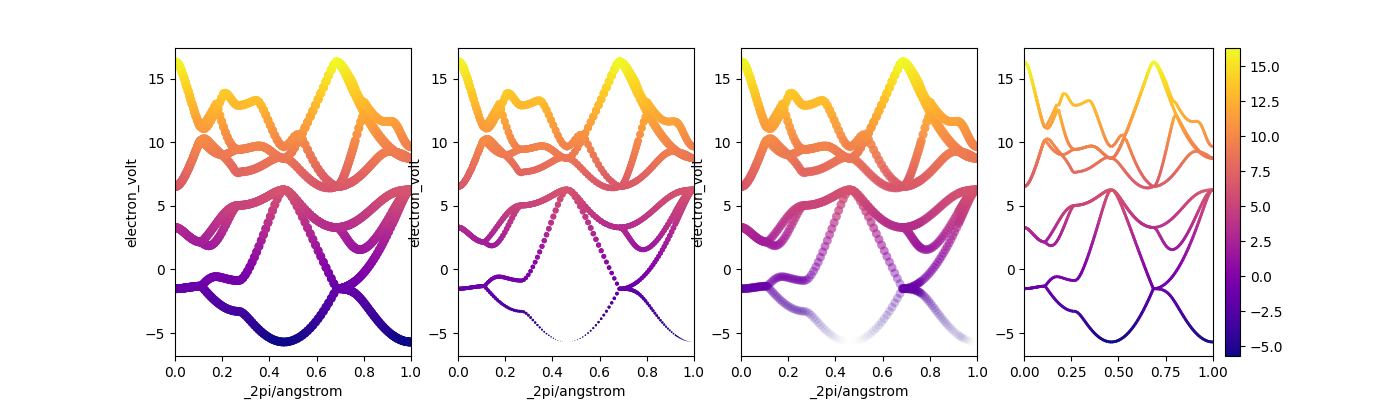

In [7]:
# Fat band plotting, the only constrait is that weights is the same shape as the eigenvalues.
fig,ax=plt.subplots(1,4,figsize=(14,4))
ax=ax.flat
x,scatter=bands.plot_fat(weights=bands.eigenvalues,ax=ax[0])
x,scatter=bands.plot_fat(weights=bands.eigenvalues,ax=ax[1],size_change=True)
x,scatter=bands.plot_fat(weights=bands.eigenvalues,ax=ax[2],alpha_change=True)
x,scatter=bands.plot_color(weights=bands.eigenvalues,ax=ax[3])
plt.colorbar(scatter)
plt.show()


### DOS calculation

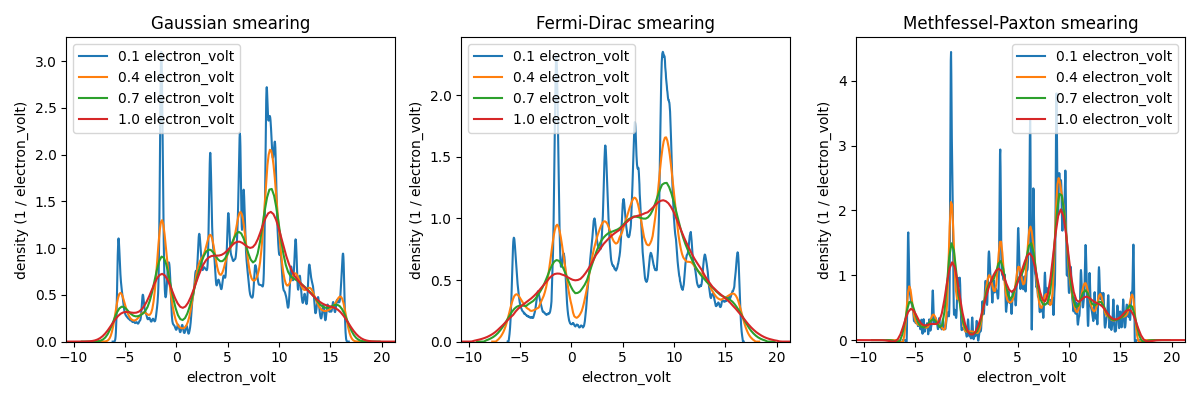

In [19]:
# Compare the DOS under different smearings
smearings=np.linspace(0.1,1,4) * ureg.eV
fig,ax=plt.subplots(1,3,figsize=(12,4))
for s in smearings:
    bands.get_DOS(smearing=s,order=0)
    bands.DOS.plot(ax[0],fill=False,label=str(s))
    bands.get_DOS(smearing=s,order=-1)
    bands.DOS.plot(ax[1],fill=False,label=str(s))
    bands.get_DOS(smearing=s,order=1)
    bands.DOS.plot(ax[2],fill=False,label=str(s))
for x in ax:
    x.legend()
ax[0].set_title('Gaussian smearing'), ax[1].set_title('Fermi-Dirac smearing'), ax[2].set_title('Methfessel-Paxton smearing')
plt.tight_layout()
plt.show()

### Density calculation

The density class can represent the density of any object. As for example orbital projecitions of Bloch functions:

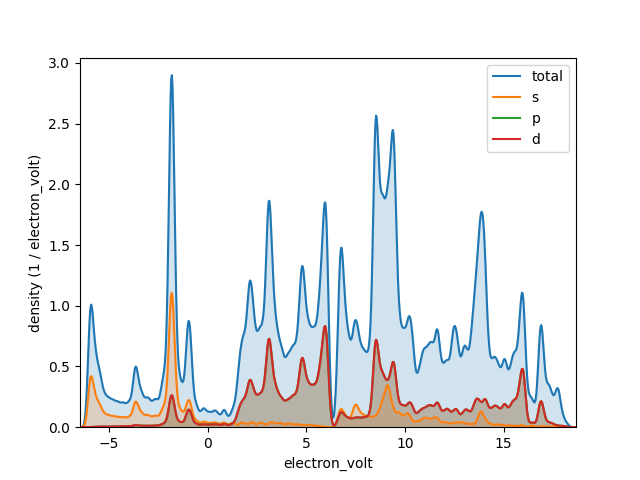

In [ ]:
# Read data:
data=grep.kpointsEnergies('data/vasp/RESULTS/PROCAR')
total=spectrum.Density.from_data(x=data.energies,weights=data.weights)
s=spectrum.Density.from_data(x=data.energies,weights=data.weights,values=data.projections(l=0))
p=spectrum.Density.from_data(x=data.energies,weights=data.weights,values=data.projections(l=1))
d=spectrum.Density.from_data(x=data.energies,weights=data.weights,values=data.projections(l=2))
ax=total.plot(label='total')
ax=s.plot(ax=ax,label='s')
ax=p.plot(ax=ax,label='p')
ax=p.plot(ax=ax,label='d')
plt.legend()
plt.show()

## Phonon bands

In [4]:
# Load the object
phonons=spectrum.PhononBands('data/qe/results_matdyn/Si.freq')
print("The PhononBands object contains")
print(phonons.__dict__.keys())

The PhononBands object contains
dict_keys(['filepath', 'eigenvalues', 'kpoints', 'weights', '_lattice', '_k_lattice', 'kpath', 'DOS'])


### Basic plot

In [5]:
# Very easy and direct plot to do
ax=phonons.plot()
plt.show()

### Get the DOS

In [6]:
# Compare the DOS under different smearings
smearings=np.linspace(5,20,4) * (ureg.speed_of_light/ureg.cm)
fig,ax=plt.subplots()
for s in smearings:
    phonons.get_DOS(smearing=s)
    ax=phonons.DOS.plot(ax,fill=False,label=str(s))
plt.legend()
plt.show()